### Data ingestion 

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [154]:
df=pd.read_csv(r"D:\Fraud detection\apps\data\rbl_fraud_dataset_20k.csv")

In [155]:
df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,transaction_type,channel,device_id,ip_address,geo_location,transaction_velocity_1h,transaction_velocity_24h,avg_spend_7d,customer_risk_score,account_age_days,card_present,international_flag,previous_fraud_history,merchant_category,is_fraud
0,1,18032,7485,49790.53,2024-09-27 09:10:00,UPI,Mobile,208391,192.168.93.164,Chennai,4,27,20112.29,0.601,1003,0,0,0,Travel,0
1,2,79655,2925,2096.82,2024-01-04 11:45:00,POS,Card,586895,192.168.91.119,Pune,1,1,52109.76,0.734,3332,1,0,0,Food,0
2,3,68910,7400,12283.73,2024-02-14 02:31:00,NetBanking,Mobile,917907,192.168.45.244,Chennai,1,7,21480.87,0.292,3137,0,0,0,Food,0
3,4,49498,6080,29907.15,2024-03-10 09:29:00,UPI,Card,302939,192.168.159.69,Chennai,5,11,33830.46,0.129,4970,1,0,0,Food,0
4,5,48970,2824,20788.96,2024-02-09 04:35:00,UPI,Web,903093,192.168.171.146,Delhi,3,7,47086.29,0.173,3878,1,1,0,Electronics,0


### EDA

In [156]:
df.shape

(20000, 20)

In [157]:
df.columns.tolist()

['transaction_id',
 'customer_id',
 'merchant_id',
 'amount',
 'transaction_time',
 'transaction_type',
 'channel',
 'device_id',
 'ip_address',
 'geo_location',
 'transaction_velocity_1h',
 'transaction_velocity_24h',
 'avg_spend_7d',
 'customer_risk_score',
 'account_age_days',
 'card_present',
 'international_flag',
 'previous_fraud_history',
 'merchant_category',
 'is_fraud']

#### Basic Info & Missing Values

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_id            20000 non-null  int64  
 1   customer_id               20000 non-null  int64  
 2   merchant_id               20000 non-null  int64  
 3   amount                    20000 non-null  float64
 4   transaction_time          20000 non-null  object 
 5   transaction_type          20000 non-null  object 
 6   channel                   20000 non-null  object 
 7   device_id                 20000 non-null  int64  
 8   ip_address                20000 non-null  object 
 9   geo_location              20000 non-null  object 
 10  transaction_velocity_1h   20000 non-null  int64  
 11  transaction_velocity_24h  20000 non-null  int64  
 12  avg_spend_7d              20000 non-null  float64
 13  customer_risk_score       20000 non-null  float64
 14  accoun

In [159]:
df.describe()

,transaction_id,customer_id,merchant_id,amount,device_id,transaction_velocity_1h,transaction_velocity_24h,avg_spend_7d,customer_risk_score,account_age_days,card_present,international_flag,previous_fraud_history,is_fraud
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,54682.557800,5514.822050,25127.553977,550982.373400,4.481600,19.418500,30403.728968,0.502882,2501.279800,0.494900,0.030250,0.049050,0.126750
std,5773.647028,25939.022951,2605.627856,14436.437155,258342.702829,2.877164,11.531349,17038.615899,0.289725,1440.510537,0.499986,0.171279,0.215978,0.332701
min,1.000000,10000.000000,1000.000000,51.370000,100141.000000,0.000000,0.000000,1001.520000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,32262.500000,3240.000000,12540.815000,328405.750000,2.000000,9.000000,15566.015000,0.252000,1234.750000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,54649.000000,5537.500000,25208.210000,551553.000000,4.000000,19.000000,30160.985000,0.505000,2497.500000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,77031.750000,7770.250000,37703.985000,773735.000000,7.000000,29.000000,45247.180000,0.753250,3757.000000,1.000000,0.000000,0.000000,0.000000
max,20000.000000,99996.000000,9998.000000,49999.130000,999922.000000,9.000000,39.000000,59994.610000,1.000000,4999.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
df.isnull().sum()

transaction_id              0
customer_id                 0
merchant_id                 0
amount                      0
transaction_time            0
transaction_type            0
channel                     0
device_id                   0
ip_address                  0
geo_location                0
transaction_velocity_1h     0
transaction_velocity_24h    0
avg_spend_7d                0
customer_risk_score         0
account_age_days            0
card_present                0
international_flag          0
previous_fraud_history      0
merchant_category           0
is_fraud                    0
dtype: int64

In [161]:
df["transaction_time"] = pd.to_datetime(df["transaction_time"])

In [162]:
fraud_rate = df["is_fraud"].mean()
print(f"\nOverall fraud rate: {fraud_rate:.4f} ({fraud_rate*100:.2f}%)")

print("\nCounts of fraud vs non-fraud:")
print(df["is_fraud"].value_counts())



Overall fraud rate: 0.1268 (12.68%)

Counts of fraud vs non-fraud:
is_fraud
0    17465
1     2535
Name: count, dtype: int64


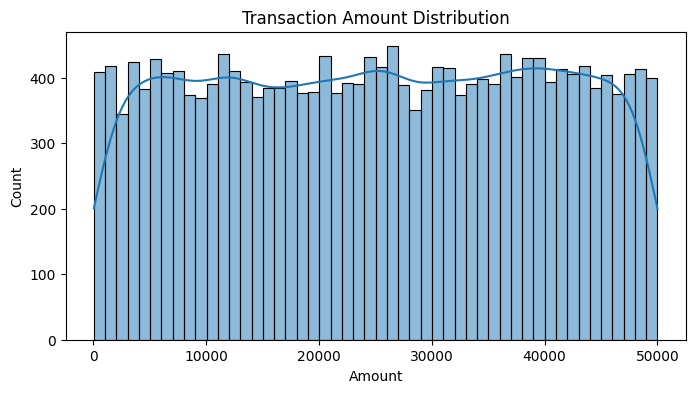

In [163]:
plt.figure(figsize=(8,4))
sn.histplot(df["amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()


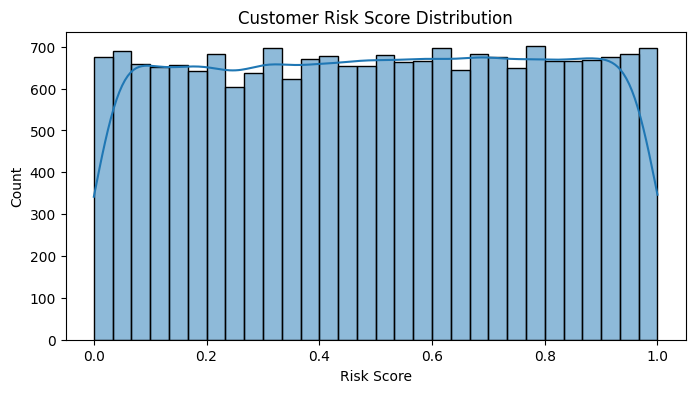

In [164]:
plt.figure(figsize=(8,4))
sn.histplot(df["customer_risk_score"], bins=30, kde=True)
plt.title("Customer Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()


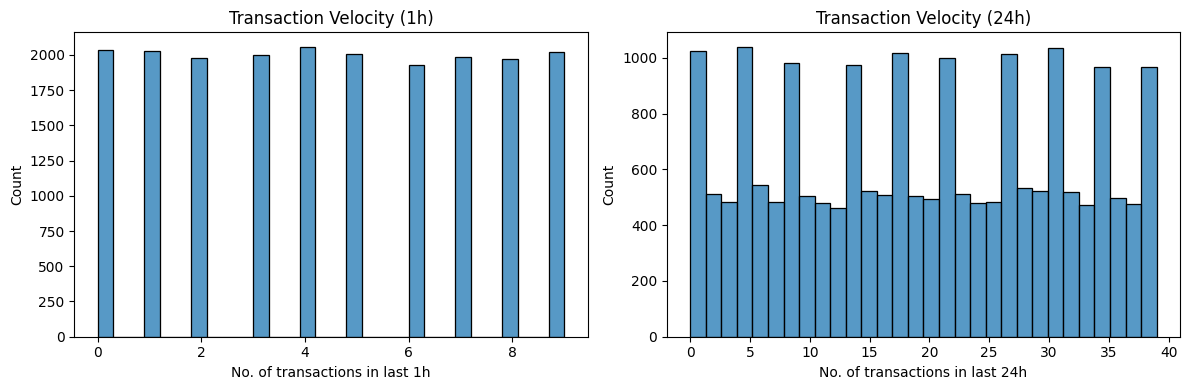

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sn.histplot(df["transaction_velocity_1h"], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Transaction Velocity (1h)")
axes[0].set_xlabel("No. of transactions in last 1h")

sn.histplot(df["transaction_velocity_24h"], bins=30, kde=False, ax=axes[1])
axes[1].set_title("Transaction Velocity (24h)")
axes[1].set_xlabel("No. of transactions in last 24h")

plt.tight_layout()
plt.show()


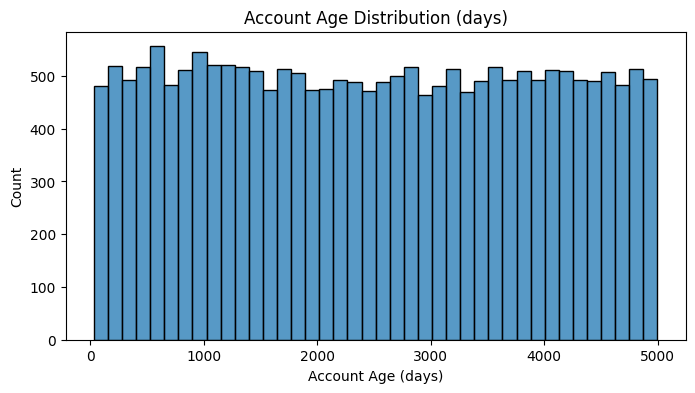

In [166]:
plt.figure(figsize=(8,4))
sn.histplot(df["account_age_days"], bins=40, kde=False)
plt.title("Account Age Distribution (days)")
plt.xlabel("Account Age (days)")
plt.ylabel("Count")
plt.show()


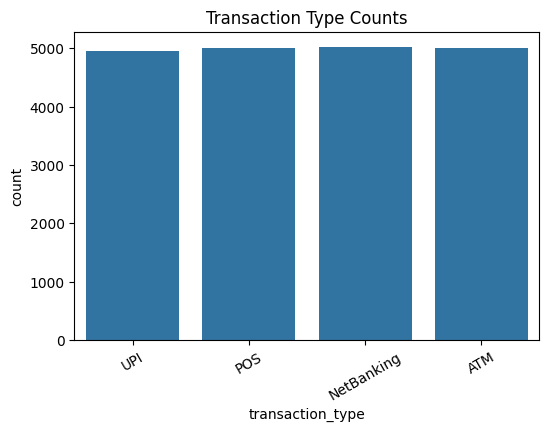


Fraud rate by transaction_type:
transaction_type
POS           0.129445
ATM           0.128369
NetBanking    0.126640
UPI           0.122503
Name: is_fraud, dtype: float64


In [167]:
plt.figure(figsize=(6,4))
sn.countplot(data=df, x="transaction_type")
plt.title("Transaction Type Counts")
plt.xticks(rotation=30)
plt.show()

# Fraud rate by transaction_type
fraud_by_type = df.groupby("transaction_type")["is_fraud"].mean().sort_values(ascending=False)
print("\nFraud rate by transaction_type:")
print(fraud_by_type)


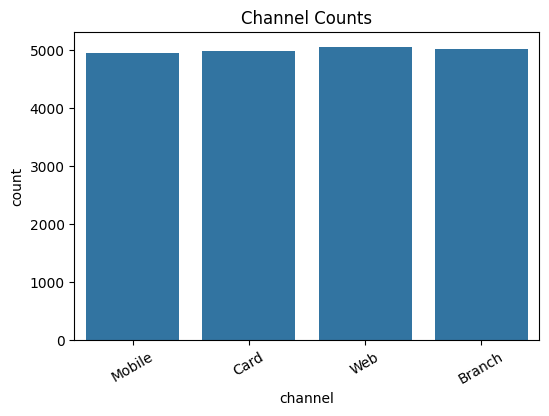


Fraud rate by channel:
channel
Branch    0.130929
Card      0.127532
Mobile    0.125936
Web       0.122627
Name: is_fraud, dtype: float64


In [168]:
plt.figure(figsize=(6,4))
sn.countplot(data=df, x="channel")
plt.title("Channel Counts")
plt.xticks(rotation=30)
plt.show()

fraud_by_channel = df.groupby("channel")["is_fraud"].mean().sort_values(ascending=False)
print("\nFraud rate by channel:")
print(fraud_by_channel)


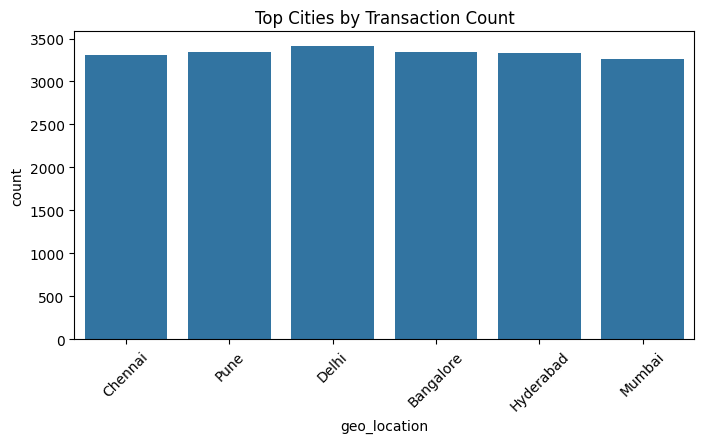


Fraud rate by geo_location (top 10 by fraud rate):
geo_location
Delhi        0.133353
Mumbai       0.129783
Bangalore    0.128704
Chennai      0.125038
Pune         0.124888
Hyderabad    0.118619
Name: is_fraud, dtype: float64


In [169]:
plt.figure(figsize=(8,4))
top_cities = df["geo_location"].value_counts().head(10).index
sn.countplot(data=df[df["geo_location"].isin(top_cities)], x="geo_location")
plt.title("Top Cities by Transaction Count")
plt.xticks(rotation=45)
plt.show()

fraud_by_city = df.groupby("geo_location")["is_fraud"].mean().sort_values(ascending=False)
print("\nFraud rate by geo_location (top 10 by fraud rate):")
print(fraud_by_city.head(10))



=== card_present ===
card_present
0    10102
1     9898
Name: count, dtype: int64
Fraud rate by card_present:
card_present
0    0.123045
1    0.130531
Name: is_fraud, dtype: float64


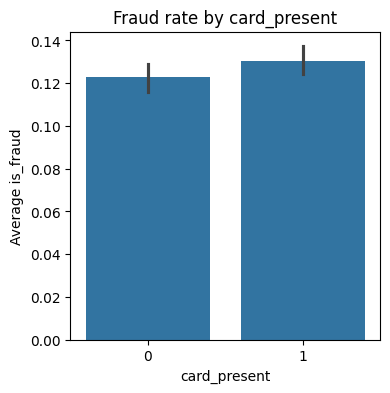


=== international_flag ===
international_flag
0    19395
1      605
Name: count, dtype: int64
Fraud rate by international_flag:
international_flag
0    0.110235
1    0.656198
Name: is_fraud, dtype: float64


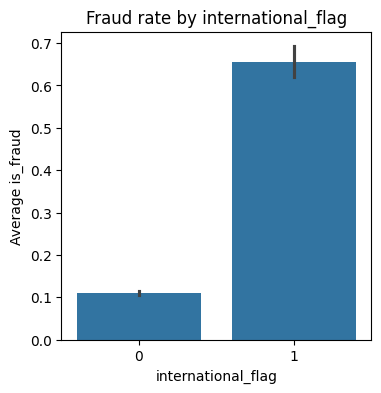


=== previous_fraud_history ===
previous_fraud_history
0    19019
1      981
Name: count, dtype: int64
Fraud rate by previous_fraud_history:
previous_fraud_history
0    0.098480
1    0.674822
Name: is_fraud, dtype: float64


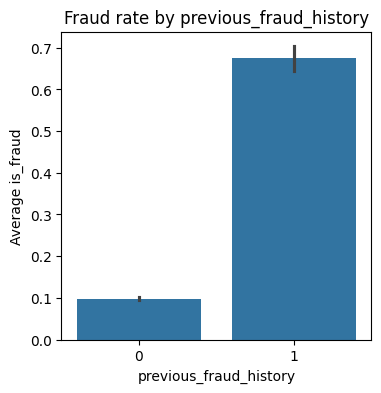

In [170]:
binary_cols = ["card_present", "international_flag", "previous_fraud_history"]

for col in binary_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())

    fraud_rate_bin = df.groupby(col)["is_fraud"].mean()
    print(f"Fraud rate by {col}:")
    print(fraud_rate_bin)

    plt.figure(figsize=(4,4))
    sn.barplot(x=df[col].astype(str), y=df["is_fraud"])
    plt.title(f"Fraud rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Average is_fraud")
    plt.show()


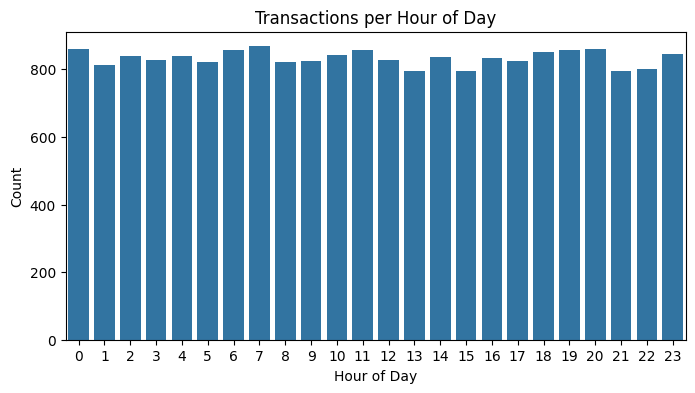


Fraud rate by hour:
hour
15    0.148241
18    0.141176
10    0.139976
22    0.138750
8     0.137303
23    0.136095
14    0.131265
4     0.130952
21    0.130653
0     0.130233
9     0.129854
1     0.129151
11    0.128505
3     0.125604
6     0.124709
13    0.124372
2     0.123810
7     0.120968
5     0.115431
12    0.114873
20    0.113821
17    0.112727
16    0.110444
19    0.105018
Name: is_fraud, dtype: float64


In [171]:
df["hour"] = df["transaction_time"].dt.hour
df["date"] = df["transaction_time"].dt.date

plt.figure(figsize=(8,4))
sn.countplot(data=df, x="hour")
plt.title("Transactions per Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

fraud_by_hour = df.groupby("hour")["is_fraud"].mean()
print("\nFraud rate by hour:")
print(fraud_by_hour.sort_values(ascending=False))


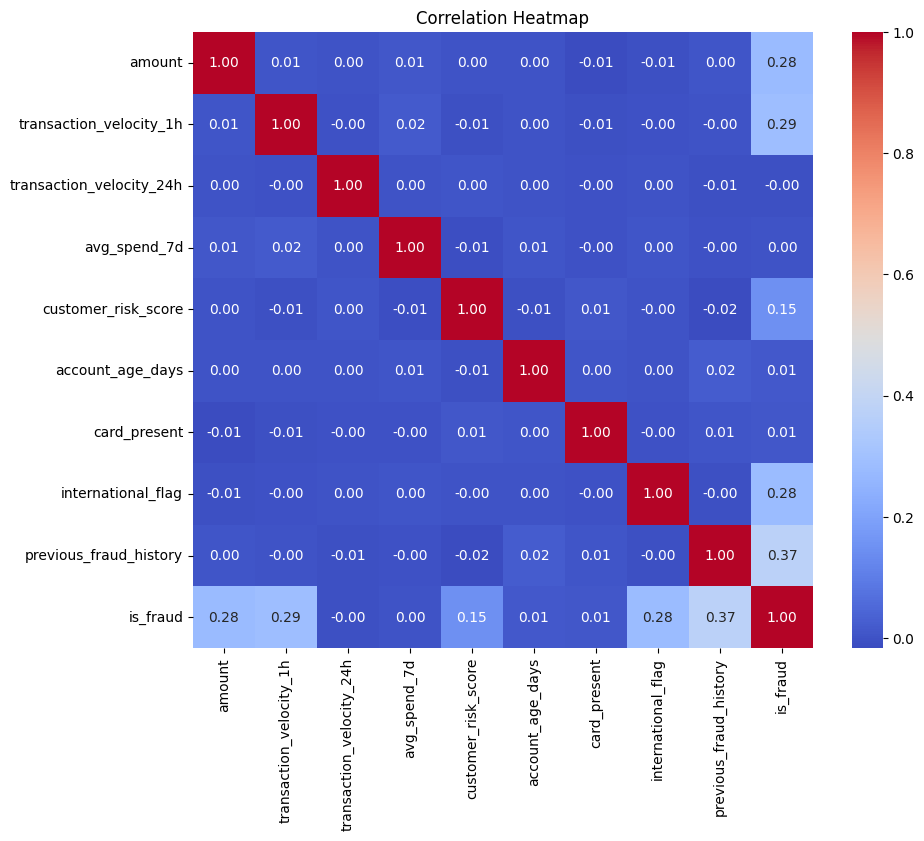


Correlation of features with is_fraud:
is_fraud                    1.000000
previous_fraud_history      0.374140
transaction_velocity_1h     0.288561
international_flag          0.281069
amount                      0.275249
customer_risk_score         0.150143
account_age_days            0.014232
card_present                0.011251
avg_spend_7d                0.001669
transaction_velocity_24h   -0.004586
Name: is_fraud, dtype: float64


In [172]:
numeric_for_corr = [
    "amount",
    "transaction_velocity_1h",
    "transaction_velocity_24h",
    "avg_spend_7d",
    "customer_risk_score",
    "account_age_days",
    "card_present",
    "international_flag",
    "previous_fraud_history",
    "is_fraud"
]

corr = df[numeric_for_corr].corr()

plt.figure(figsize=(10,8))
sn.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("\nCorrelation of features with is_fraud:")
print(corr["is_fraud"].sort_values(ascending=False))


In [173]:
# Example of flagging suspicious transactions (just an illustration)
suspicious = df[
    (df["amount"] > 30000) |
    (df["transaction_velocity_24h"] > 20) |
    (df["customer_risk_score"] > 0.7) |
    ((df["card_present"] == 0) & (df["international_flag"] == 1))
]

print("\nNumber of suspicious transactions (rule-based):", suspicious.shape[0])
suspicious.head() #doubtfull



Number of suspicious transactions (rule-based): 15666


,transaction_id,customer_id,merchant_id,amount,transaction_time,transaction_type,channel,device_id,ip_address,geo_location,transaction_velocity_1h,transaction_velocity_24h,avg_spend_7d,customer_risk_score,account_age_days,card_present,international_flag,previous_fraud_history,merchant_category,is_fraud,hour,date
0,1,18032,7485,49790.53,2024-09-27 09:10:00,UPI,Mobile,208391,192.168.93.164,Chennai,4,27,20112.29,0.601,1003,0,0,0,Travel,0,9,2024-09-27
1,2,79655,2925,2096.82,2024-01-04 11:45:00,POS,Card,586895,192.168.91.119,Pune,1,1,52109.76,0.734,3332,1,0,0,Food,0,11,2024-01-04
5,6,87272,5225,31895.93,2024-12-12 17:23:00,POS,Branch,304598,192.168.71.33,Bangalore,1,31,30448.67,0.385,1848,1,0,0,Bills,0,17,2024-12-12
7,8,72762,7315,39410.07,2024-05-21 21:07:00,ATM,Branch,482910,192.168.66.67,Hyderabad,1,31,18731.97,0.857,458,1,0,0,Electronics,0,21,2024-05-21
9,10,18475,4450,22058.77,2024-02-12 21:41:00,ATM,Web,809497,192.168.239.194,Hyderabad,6,23,17217.38,0.369,1780,1,0,0,Travel,0,21,2024-02-12


###  FEATURE ENGINEERING — Fix Data Leakage, Extract Time Features


In [174]:
df['transaction_time']=pd.to_datetime(df['transaction_time'],format="%d-%m-%Y %H.%M")

In [175]:
#Feature Extract

df['hour']=df['transaction_time'].dt.hour
df['day']=df['transaction_time'].dt.day
df['month']=df['transaction_time'].dt.month



In [176]:
df[['hour','day','month']].head()

,hour,day,month
0,9,27,9
1,11,4,1
2,2,14,2
3,9,10,3
4,4,9,2


In [177]:
# Remove leakage features
df = df.drop(["transaction_time", "ip_address"], axis=1)

In [178]:
df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_type,channel,device_id,geo_location,transaction_velocity_1h,transaction_velocity_24h,avg_spend_7d,customer_risk_score,account_age_days,card_present,international_flag,previous_fraud_history,merchant_category,is_fraud,hour,date,day,month
0,1,18032,7485,49790.53,UPI,Mobile,208391,Chennai,4,27,20112.29,0.601,1003,0,0,0,Travel,0,9,2024-09-27,27,9
1,2,79655,2925,2096.82,POS,Card,586895,Pune,1,1,52109.76,0.734,3332,1,0,0,Food,0,11,2024-01-04,4,1
2,3,68910,7400,12283.73,NetBanking,Mobile,917907,Chennai,1,7,21480.87,0.292,3137,0,0,0,Food,0,2,2024-02-14,14,2
3,4,49498,6080,29907.15,UPI,Card,302939,Chennai,5,11,33830.46,0.129,4970,1,0,0,Food,0,9,2024-03-10,10,3
4,5,48970,2824,20788.96,UPI,Web,903093,Delhi,3,7,47086.29,0.173,3878,1,1,0,Electronics,0,4,2024-02-09,9,2


In [179]:
categorical_cols=[]

for i in df.columns:
    if df[i].dtype=='object':
        categorical_cols.append(i)
print(categorical_cols)


['transaction_type', 'channel', 'geo_location', 'merchant_category', 'date']


In [180]:
df=df.drop(columns='date',axis=1)

In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Categorical columns
cat_cols = ["transaction_type", "channel", "geo_location", "merchant_category"]

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])   # Encode the column
    encoders[col] = le                   # Store the encoder


In [183]:
pickle.dump(encoders, open("encoders.pkl", "wb"))


In [184]:
df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_type,channel,device_id,geo_location,transaction_velocity_1h,transaction_velocity_24h,avg_spend_7d,customer_risk_score,account_age_days,card_present,international_flag,previous_fraud_history,merchant_category,is_fraud,hour,day,month
0,1,18032,7485,49790.53,3,2,208391,1,4,27,20112.29,0.601,1003,0,0,0,6,0,9,27,9
1,2,79655,2925,2096.82,2,1,586895,5,1,1,52109.76,0.734,3332,1,0,0,3,0,11,4,1
2,3,68910,7400,12283.73,1,2,917907,1,1,7,21480.87,0.292,3137,0,0,0,3,0,2,14,2
3,4,49498,6080,29907.15,3,1,302939,1,5,11,33830.46,0.129,4970,1,0,0,3,0,9,10,3
4,5,48970,2824,20788.96,3,3,903093,2,3,7,47086.29,0.173,3878,1,1,0,2,0,4,9,2


In [185]:
#  OUTLIER DETECTION — Solve using IQR Method

Q1=df['amount'].quantile(0.25)
Q3=df['amount'].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR

upper=Q3+1.5*IQR

print(lower,upper)


-25203.940000000006 75448.74


In [186]:
df['amount'] = np.where(df['amount'] > upper, upper,
                 np.where(df['amount'] < lower, lower, df['amount']))

print("\n✔ Outliers handled using IQR")


✔ Outliers handled using IQR


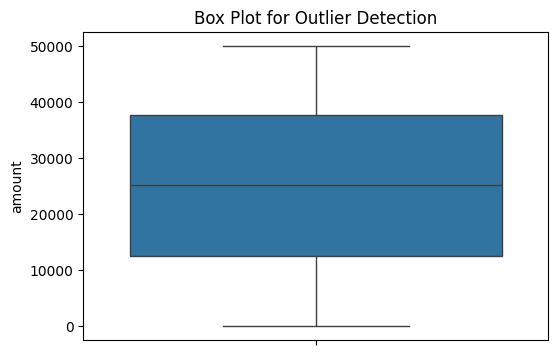

In [187]:
plt.figure(figsize=(6,4))
sn.boxplot(data=df['amount'])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [188]:
# 5. DEFINE FEATURES & TARGET

X = df.drop(columns="is_fraud", axis=1)
y = df["is_fraud"]

In [189]:
X.shape,y.shape

((20000, 20), (20000,))

In [190]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
# 6. MULTICOLLINEARITY — Check using VIF

num_cols=X.select_dtypes(include=['int64','float64']).columns

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X[num_cols])

vif=pd.DataFrame()

vif['feature']=num_cols
vif['VIF']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

vif



,feature,VIF
0,transaction_id,1.000408
1,customer_id,1.001048
2,merchant_id,1.001061
3,amount,1.000631
4,transaction_type,1.001054
5,channel,1.000898
6,device_id,1.000863
7,geo_location,1.000631
8,transaction_velocity_1h,1.000934
9,transaction_velocity_24h,1.000767


In [192]:
#  FIX CLASS IMBALANCE — SMOTE Oversampling

y.value_counts()

is_fraud
0    17465
1     2535
Name: count, dtype: int64

In [193]:
from imblearn.over_sampling import SMOTE

In [194]:

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

print("\n After SMOTE:", y_res.value_counts())


 After SMOTE: is_fraud
0    17465
1    17465
Name: count, dtype: int64


In [195]:
from sklearn.model_selection import train_test_split

In [196]:
#  TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [197]:
X_train.shape,y_train.shape

((27944, 20), (27944,))

### model selection

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = {
    "LogisticRegression": LogisticRegression(max_iter=500, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='rbf', probability=True)
}


In [199]:
models.items()

dict_items([('LogisticRegression', LogisticRegression(class_weight='balanced', max_iter=500)), ('RandomForest', RandomForestClassifier(max_depth=10, n_estimators=200)), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)), ('SVM', SVC(probability=True))])

In [200]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score

In [201]:
results={}

for i,j in models.items():
    j.fit(X_train,y_train)
    y_prd=j.predict(X_test)
    results[i]=accuracy_score(y_test,y_prd)

print(results)


d:\Fraud detection\apps\fraud\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Fraud detection\apps\fraud\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'LogisticRegression': 0.754222731176639, 'RandomForest': 0.8955052963068996, 'XGBoost': 0.9262811336959633, 'SVM': 0.7327512167191526}


In [202]:
best_model_name = max(results, key=results.get)
print("Best Model is:", best_model_name)


Best Model is: XGBoost


In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
#Hyperparameter Tuning ONLY for the best model

params = {
    'n_estimators':[100,200,300],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='f1')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [205]:
print(best_model)

RandomForestClassifier(max_depth=15, n_estimators=300)


In [206]:
params = {
    "learning_rate":[0.01, 0.1],
    "max_depth":[3,5,8],
    "n_estimators":[100,200,300]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), params, cv=3, scoring='f1')
grid.fit(X_train, y_train)

best_models = grid.best_estimator_


In [207]:
print(best_models)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)


In [208]:
y_pred = best_models.predict(X_test)


print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3482
           1       0.92      0.95      0.94      3504

    accuracy                           0.94      6986
   macro avg       0.94      0.94      0.94      6986
weighted avg       0.94      0.94      0.94      6986

0.93687374749499


In [209]:
import pickle
pickle.dump(best_models, open("model_xgb.pkl", "wb"))


In [210]:
X_train.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_type', 'channel', 'device_id', 'geo_location',
       'transaction_velocity_1h', 'transaction_velocity_24h', 'avg_spend_7d',
       'customer_risk_score', 'account_age_days', 'card_present',
       'international_flag', 'previous_fraud_history', 'merchant_category',
       'hour', 'day', 'month'],
      dtype='object')